# Car Price Prediction

#### Main aim of this project is to predict prices of used cars based on various features such as Brand Name, Type of the wheels, Horsepower etc.

## Steps to build a model

#### 1) Data Collection
#### 2) Data Understanding
#### 3) Data Manipulation
#### 4) Data Visualization
#### 5) Build a Model
#### 6) Evaluate model performance

## Problem Statements

#### 1) Calculate and Visualize the counts of each cars.
#### 2) Calculate and Visualize counts of type of engines.
#### 3) Estimate and display amount of fuels used by each cars.
#### 4) Evaluate count of different design, shapes of each cars.
#### 5) Top 5 cars whose average running capacity is high.
#### 6) Calculate average price of each cars.
#### 7) Visualize top 5 car names whose risk level percentage are high.
#### 8) Evaluate count of each risk-level of cars.
#### 9) Calculate count of driving wheels.
#### 10) Evaluate count of engine location of brands in percentages.  

## So Lets Start !

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Step1: Data Collection

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
# Feature Engineering on make feature
df.rename(columns = {'make' : 'Car Name'},inplace = True)

In [5]:
df.head()

,symboling,normalized-losses,Car Name,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Step2: Data Understanding

In [6]:
# Get all details about each features of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   Car Name           205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


#### Information about each features
###### Symboling : Risk Level of the cars.
###### Normalized Loss : Average loss per insured vehicle year.
###### Car Name : Brand Name of the cars.
###### Fuel-Type : Types of fuels (Gas,Diesel)
###### Body-Style : Style of the cars such as its shape,size,design etc.
###### Drive-Wheels : Wheel of vehicle is used to move the cars by force/speed.
###### Engine-Location : Location of Engine.
###### Width : Width of the cars.
###### Height : Height of the cars.
###### Engine-Type : Type of Engines
###### Engine-Size :Size of Engines.
###### HorsePower : Maximum running capacity of cars.
###### City-mpg : Score of a cars will get on average in city conditions with starting,stopping at lower speed.
###### Highway-mpg : Score of a cars will get on average in city conditions without starting,stopping at higher speed.
###### Price : Price of a cars.

In [7]:
# Get the total counts of rows and columns of dataset
df.shape

(205, 15)

In [8]:
# Get the total values of dataset
df.size

3075

In [9]:
# Check null or missing values
df.isnull().sum()

symboling            0
normalized-losses    0
Car Name             0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Check duplicate values
df.duplicated().sum()

0

In [11]:
df.apply(lambda col : col.unique())

symboling                                         [3, 1, 2, 0, -1, -2]
normalized-losses    [?, 164, 158, 192, 188, 121, 98, 81, 118, 148,...
Car Name             [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fuel-type                                                [gas, diesel]
body-style             [convertible, hatchback, sedan, wagon, hardtop]
drive-wheels                                           [rwd, fwd, 4wd]
engine-location                                          [front, rear]
width                [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
height               [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
engine-type                   [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
engine-size          [130, 152, 109, 136, 131, 108, 164, 209, 61, 9...
horsepower           [111, 154, 102, 115, 110, 140, 160, 101, 121, ...
city-mpg             [21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 3...
highway-mpg          [27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...
price 

In [12]:
# Descriptive Analysis
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


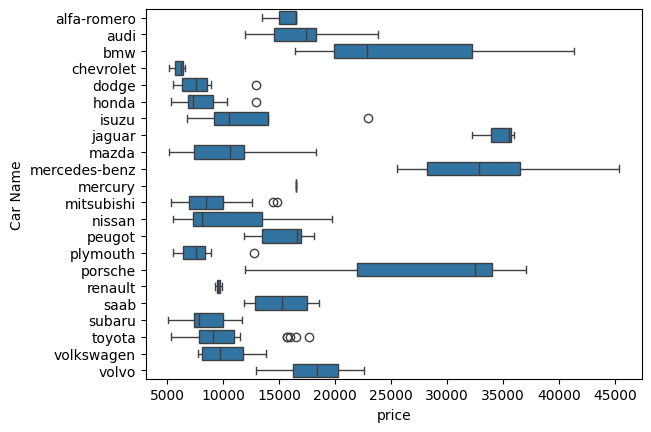

In [13]:
# Checking outliers
sns.boxplot(data = df,x = df['price'],y = df['Car Name'])
plt.show()

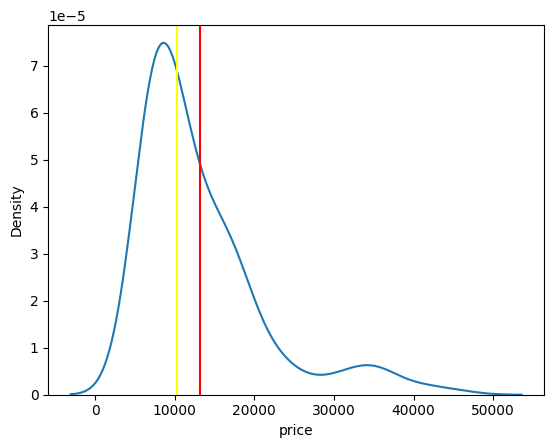

In [14]:
mean = df['price'].mean()
med = df['price'].median()
sns.distplot(df['price'],hist = False)
plt.axvline(mean,c = 'red')
plt.axvline(med,c = 'yellow')
plt.show()

### What you understand by your Data?
#### i) Dataset contain 205 rows and 15 coulmns.
#### ii) Total size of dataset is 3075.
#### iii) normalized-losses and horsepower features need to manipulate in numeric format because of missing values both columns in object datatype.
#### iv) Descriptive status is fine. After data manipulation we need to check descriptive status again.
#### v) There is no duplicate rows and columns
#### vi) Here there are some outlier need to handle it

### Step3: Data Manipulation

#### Perform manipulation on normalized-losses and horsepower features

In [15]:
# Find unique values
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [16]:
# Missing value replaced with nan value
df['normalized-losses'].replace('?',np.nan,inplace = True)

In [17]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [18]:
# Transform given feature datatype object into float
df['normalized-losses']=df['normalized-losses'].astype('float')

In [19]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype  
--------------  -----  
164 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [20]:
# Check null values in normalized-losses. Count of null values is more so here imputation is required
df['normalized-losses'].isnull().sum()

41

In [21]:
# Less chances of outliers so impute mean value
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,35.442168,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [22]:
# Perform imputation by inserting mean values in place of nan
mean_value = df['normalized-losses'].mean()
df['normalized-losses'].fillna(mean_value,inplace = True)

In [23]:
df['normalized-losses'].unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [24]:
df['normalized-losses'].isnull().sum()

0

In [25]:
# Find unique values
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [26]:
# Missing value replaced with nan value
df['horsepower'].replace('?',np.nan,inplace = True)

In [27]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [28]:
# Transform given feature datatype object into float
df['horsepower']=df['horsepower'].astype('float')

In [29]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
203 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [30]:
# Check null values in horsepower. Count of null values is less, so here drop that rows instead performing imputation
df['horsepower'].isnull().sum()

2

In [31]:
df.dropna(inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   Car Name           203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 25.4+ KB


In [33]:
df['horsepower'].isnull().sum()

0

In [34]:
df.head()

,symboling,normalized-losses,Car Name,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


#### Remove Outliers

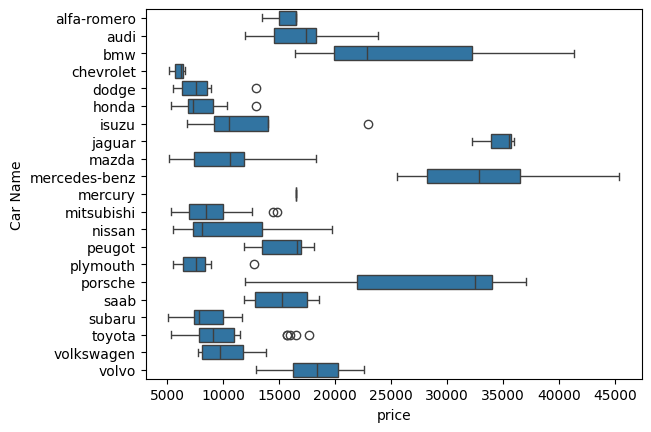

In [35]:
sns.boxplot(data = df,x = df['price'],y = df['Car Name'])
plt.show()

In [36]:
df[(df['Car Name'] == 'toyota') & (df['price'] > 14000)]
df.drop(index = [172,178,179,180,181],inplace = True)

In [37]:
df[(df['Car Name'] == 'plymouth') & (df['price'] > 12000)]
df.drop(index = 124,inplace = True)

In [38]:
df[(df['Car Name'] == 'mitsubishi') & (df['price'] > 13000)]
df.drop(index = [83,84],inplace = True)

In [39]:
df[(df['Car Name'] == 'isuzu') & (df['price'] > 22000)]
df.drop(index = 45,inplace = True)

In [40]:
df[(df['Car Name'] == 'honda') & (df['price'] > 12000)]
df.drop(index = 41,inplace = True)

In [41]:
df[(df['Car Name'] == 'dodge') & (df['price'] > 11000)]
df.drop(index = 29,inplace = True)

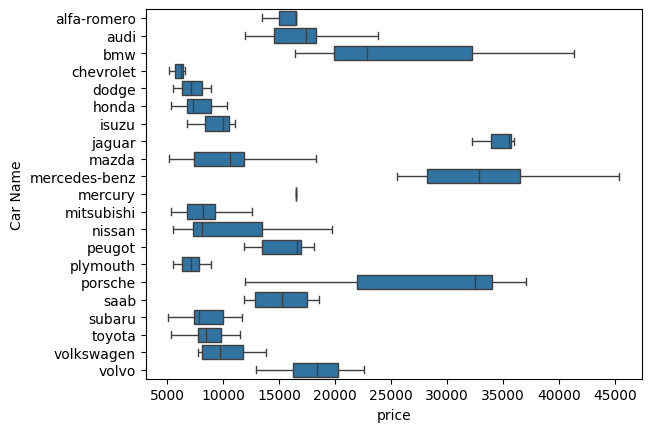

In [42]:
sns.boxplot(data = df,x = df['price'],y = df['Car Name'])
plt.show()

In [43]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.786458,121.395833,65.885417,53.832292,125.562500,102.411458,25.437500,30.984375,13123.682292
std,1.202625,31.570242,2.199713,2.447009,42.251259,39.512109,6.575876,6.917976,8109.355706
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.250000,64.000000,52.000000,97.000000,70.000000,19.000000,25.000000,7725.750000
50%,1.000000,122.000000,65.400000,54.100000,110.000000,94.500000,25.000000,30.000000,9997.500000
75%,2.000000,137.000000,66.900000,55.700000,141.000000,116.000000,30.250000,36.250000,16500.750000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


#### i) Here I replaced missing values with mean values in 'normalized-loss' feature and I removed missing values in 'horsepower'      feature.
#### ii) I also handle ouliers

### Step 4 :  Data Visualization

#### Problem Statements

#### i) Univariate Analysis

#####  Calculate and Visualize the counts of each cars.

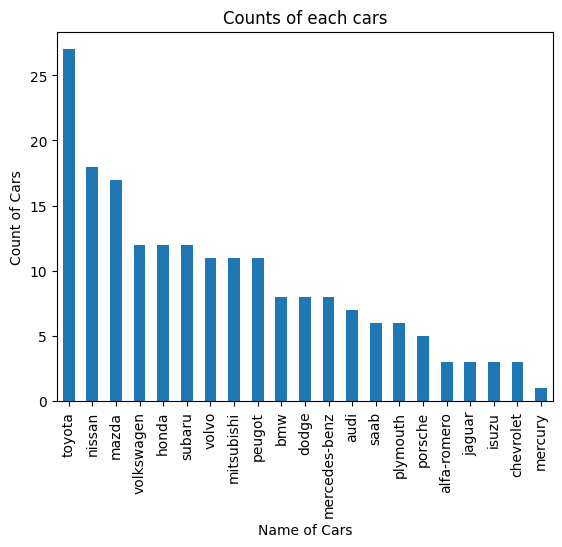

In [44]:
df['Car Name'].value_counts().plot(kind = 'bar')
plt.title('Counts of each cars')
plt.xlabel('Name of Cars')
plt.ylabel('Count of Cars')
plt.show()

#####  Calculate and Visualize counts of type of engines.

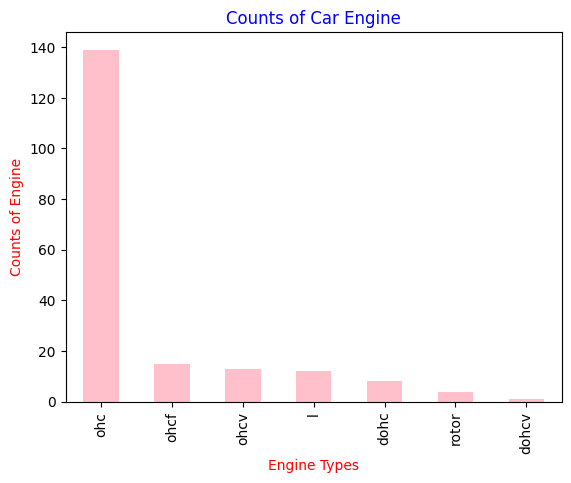

In [45]:
df['engine-type'].value_counts().plot(kind = 'bar',color = 'pink')
plt.title('Counts of Car Engine',c = 'blue')
plt.xlabel('Engine Types',c = 'red')
plt.ylabel('Counts of Engine', c = 'red')
plt.show()

##### Evaluate count of different design, shapes of each cars.¶

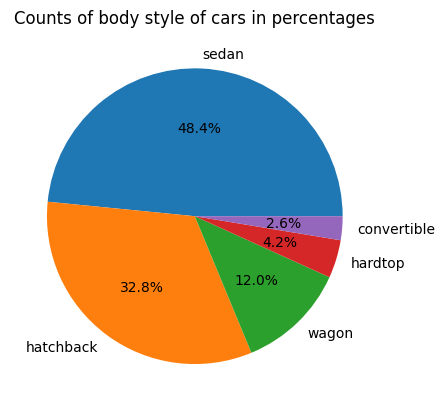

In [46]:
df['body-style'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Counts of body style of cars in percentages')
plt.ylabel('')
plt.show()

##### Calculate count of driving wheels.

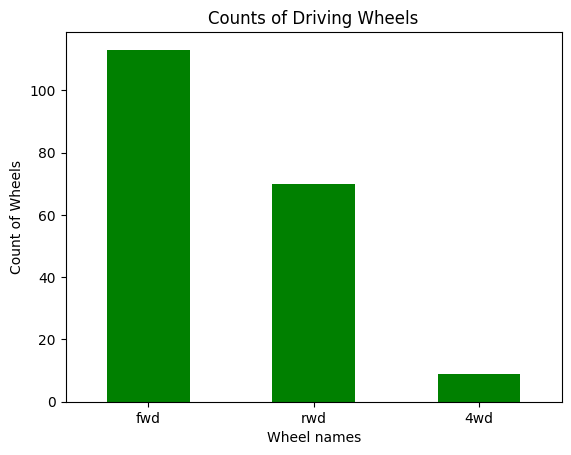

In [47]:
df['drive-wheels'].value_counts().plot(kind = 'bar',color = 'green')
plt.title('Counts of Driving Wheels')
plt.xlabel('Wheel names')
plt.ylabel('Count of Wheels')
plt.xticks(rotation = 0)
plt.show()

##### Evaluate count of each risk-level of cars.

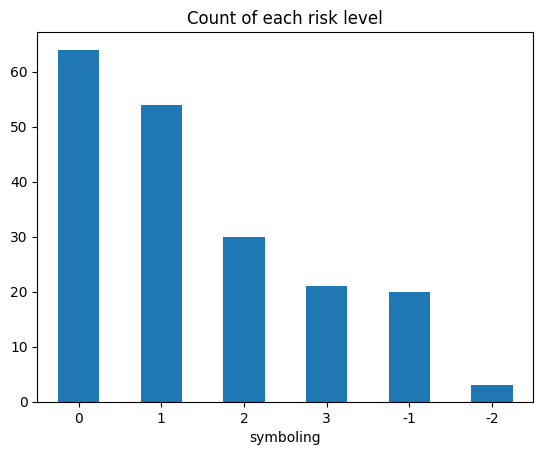

In [48]:
df['symboling'].value_counts().plot(kind = 'bar')
plt.title('Count of each risk level')
plt.xticks(rotation = 0)
plt.show()

##### Evaluate count of engine location of brands in percentages.

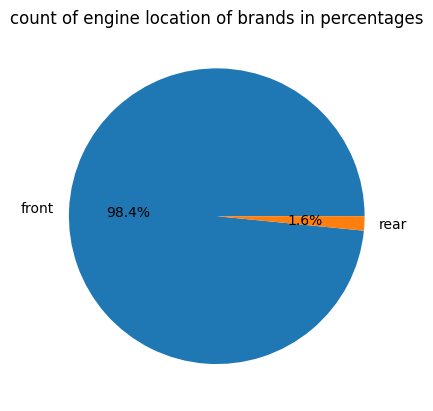

In [49]:
df['engine-location'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('count of engine location of brands in percentages')
plt.ylabel('')
plt.show()

#### ii) Bivariate Analysis

##### Top 5 cars whose average running capacity is high.

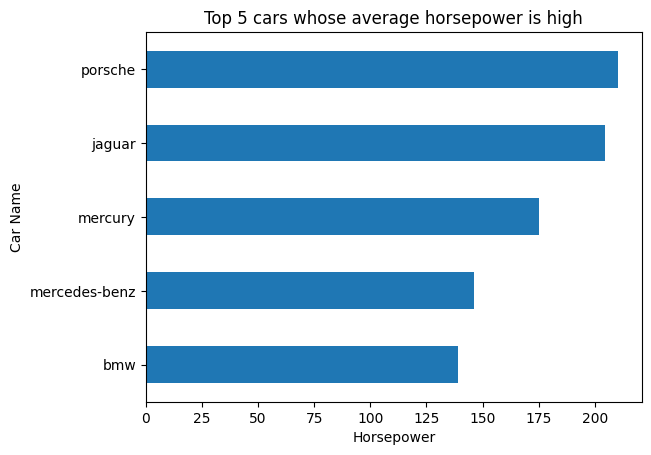

In [50]:
df.groupby('Car Name')['horsepower'].mean().sort_values().tail(5).plot(kind = 'barh')
plt.title('Top 5 cars whose average horsepower is high')
plt.xlabel('Horsepower')
plt.ylabel('Car Name')
plt.show()

##### Estimate and display amount of fuels used by each cars.

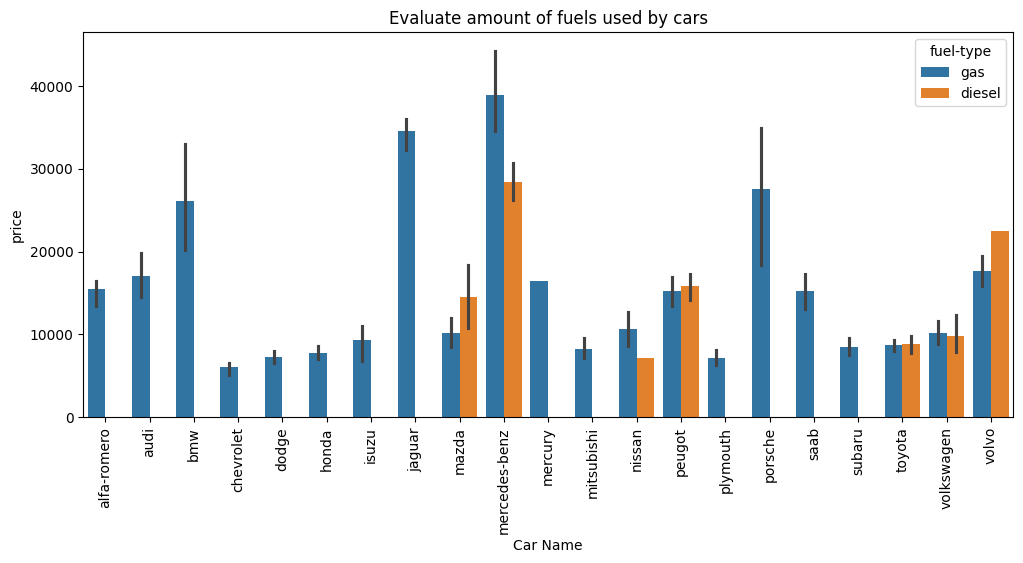

In [51]:
plt.figure(figsize = [12,5])
sns.barplot(data = df,x = df['Car Name'],y = df['price'],hue = df['fuel-type'])
plt.title('Evaluate amount of fuels used by cars')
plt.xticks(rotation = 90)
plt.show()

##### Calculate average price of each cars.

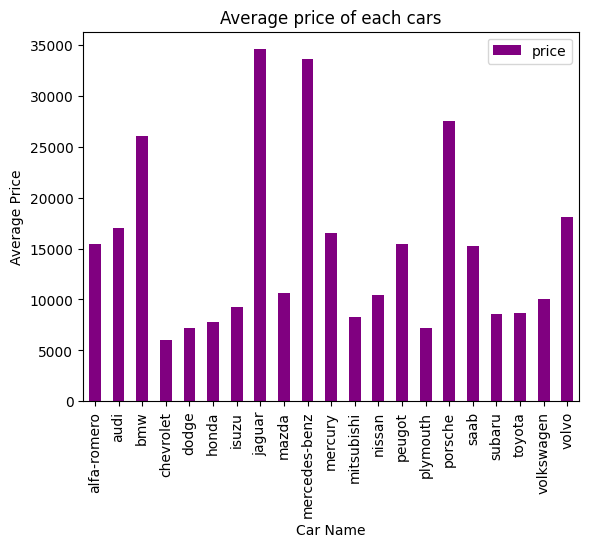

In [52]:
df.groupby(['Car Name'])[['price']].mean().plot(kind = 'bar',color = 'purple')
plt.title('Average price of each cars')
plt.ylabel('Average Price')
plt.show()

##### Visualize top 5 car names whose risk level percentage are high.

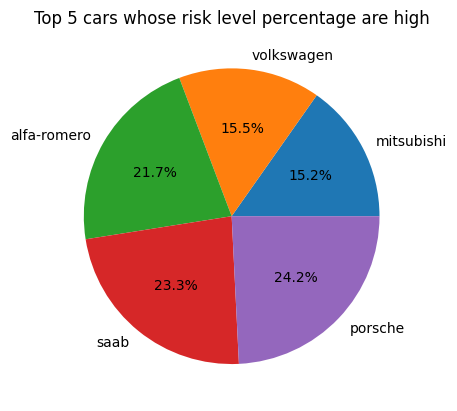

In [53]:
df.groupby('Car Name')['symboling'].mean().sort_values().tail(5).plot(kind = 'pie',autopct = '%1.1f%%')
plt.title('Top 5 cars whose risk level percentage are high')
plt.ylabel('')
plt.show()

#### Perform Encoding

In [54]:
# Split dataset in numerical and categorical
df_categorical_data = df.select_dtypes('object')
df_numerical_data = df.select_dtypes(include = ['int','float'])

In [55]:
df_categorical_data

,Car Name,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [56]:
df_numerical_data

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [57]:
# Transform Categorical variables into numerical values
for col in df_categorical_data:
    le = LabelEncoder()
    df_categorical_data[col] = le.fit_transform(df_categorical_data[col])

In [58]:
df_categorical_data

,Car Name,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,20,1,3,2,0,3
201,20,1,3,2,0,3
202,20,1,3,2,0,5
203,20,0,3,2,0,3


In [59]:
# Combine Categorical and Numerical data
df_new_dataset = pd.concat([df_categorical_data,df_numerical_data],axis = 1)

In [60]:
df_new_dataset.head()

,Car Name,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


#### iii) Multivariate Analysis

In [61]:
# Find relationships between dependent and independent features
corr = df_new_dataset.corr()

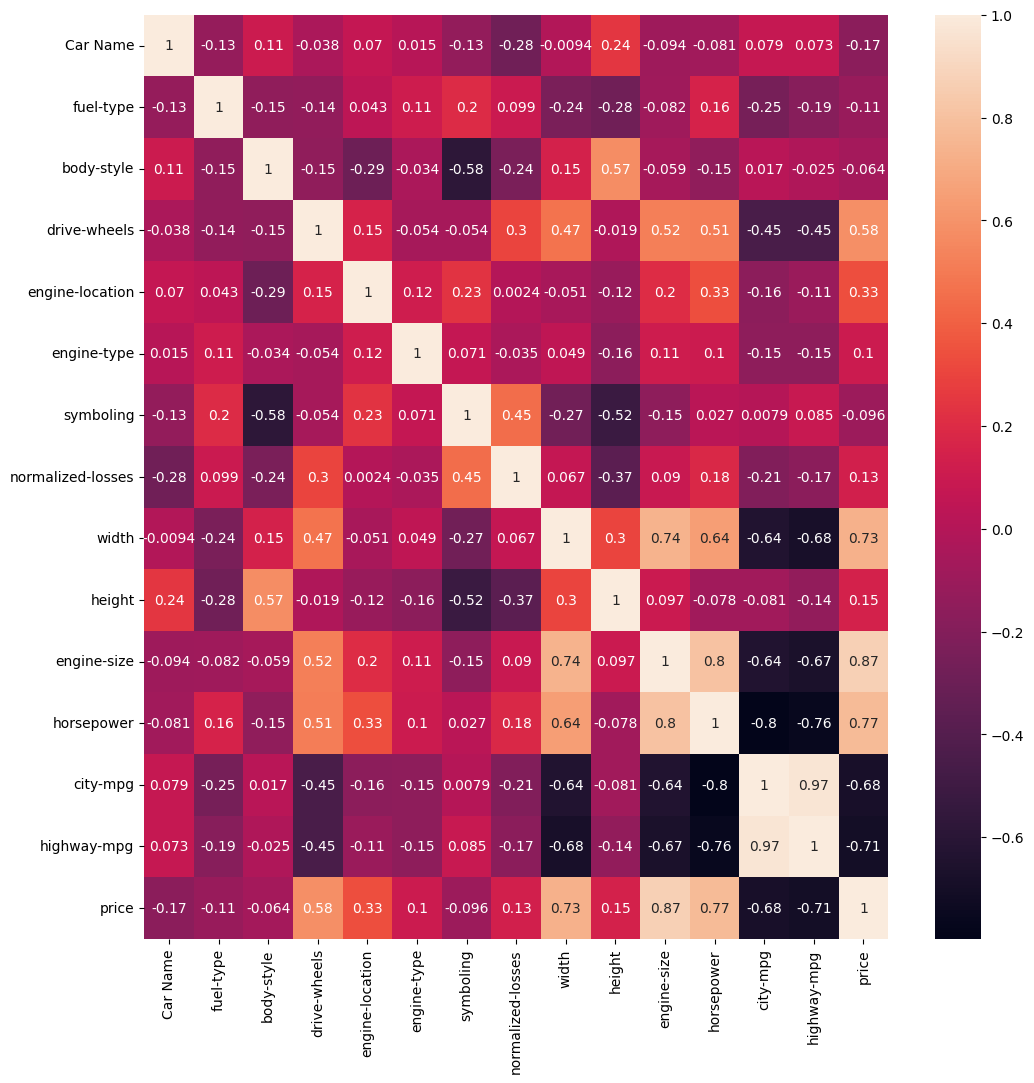

In [62]:
# Find relationships between dependent and independent features
corr = df_new_dataset.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr,annot = True)
plt.show()

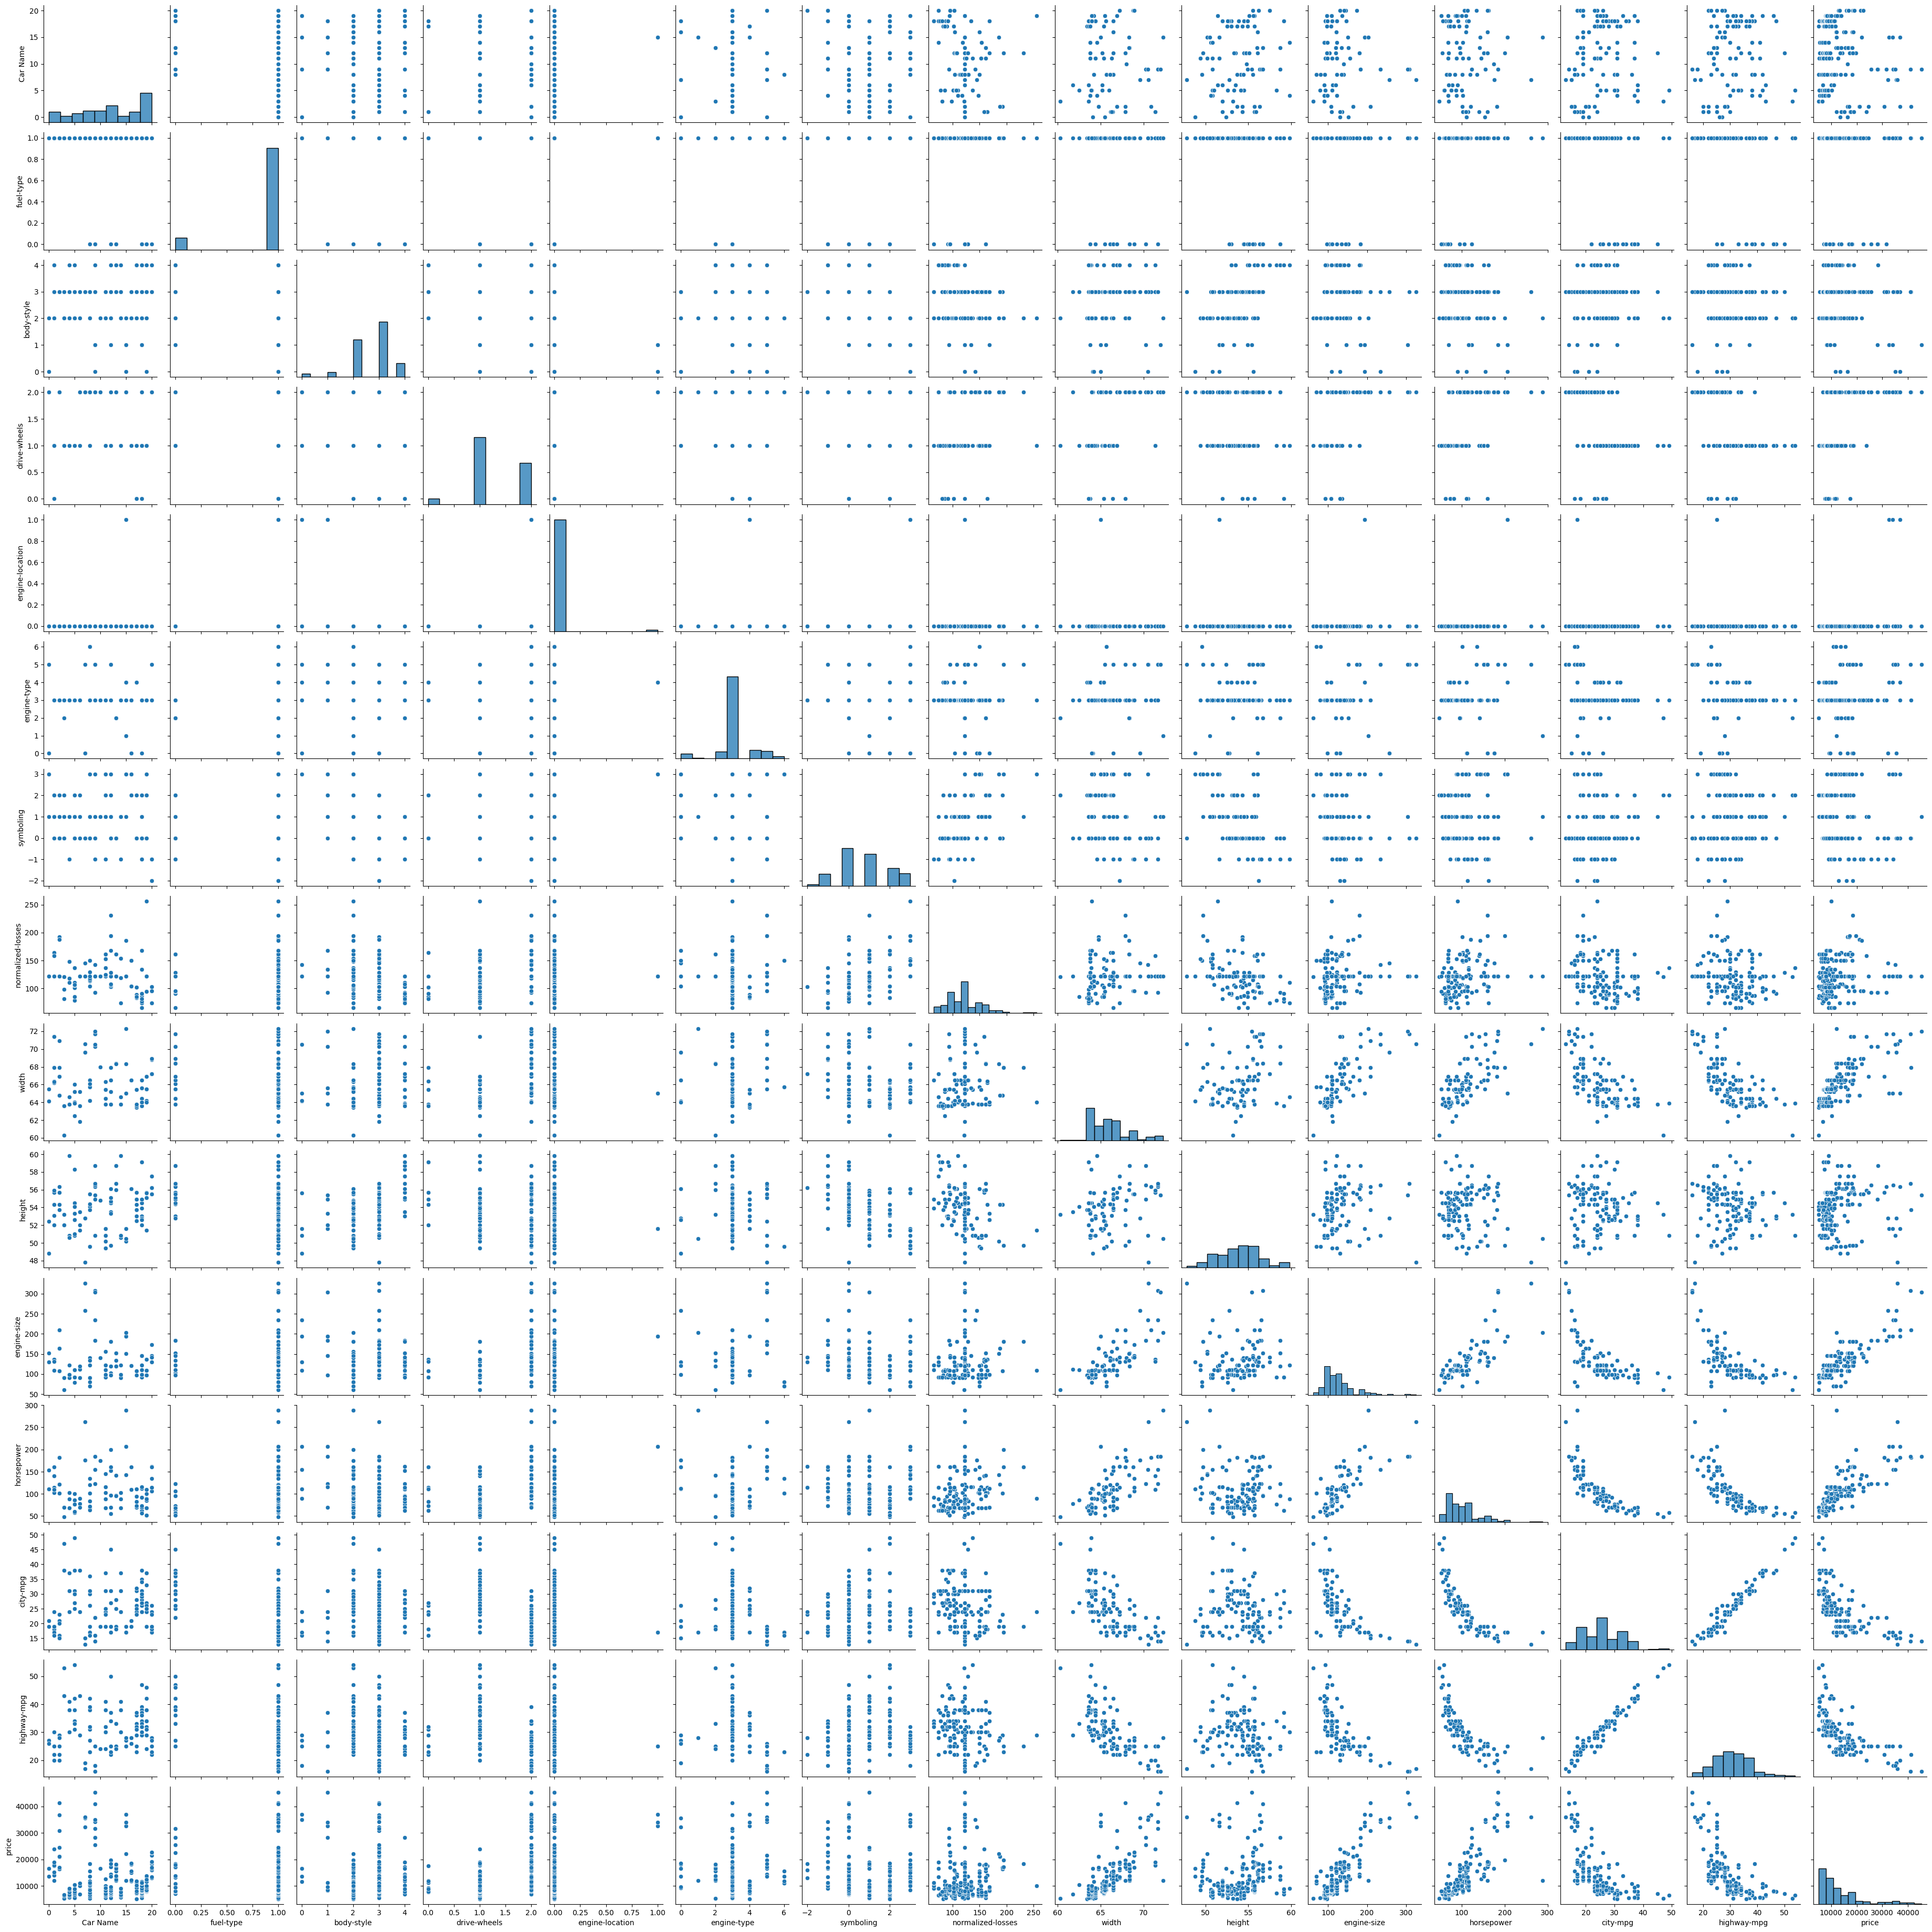

In [63]:
sns.pairplot(df_new_dataset)
plt.show()

In [64]:
df_new_dataset.head()

,Car Name,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


#### Steps Before Applying Machine Learning Model

In [65]:
# Split data into dependent and independent variables
x = df_new_dataset.iloc[:,:-1]
y = df_new_dataset['price']

In [66]:
x

,Car Name,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,20,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28
201,20,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25
202,20,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23
203,20,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27


In [67]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 192, dtype: int64

In [68]:
# Split data into Train and Test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [69]:
# Feature Scaling 
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

### Step 5 : Build Model

#### Linear Regression

In [70]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

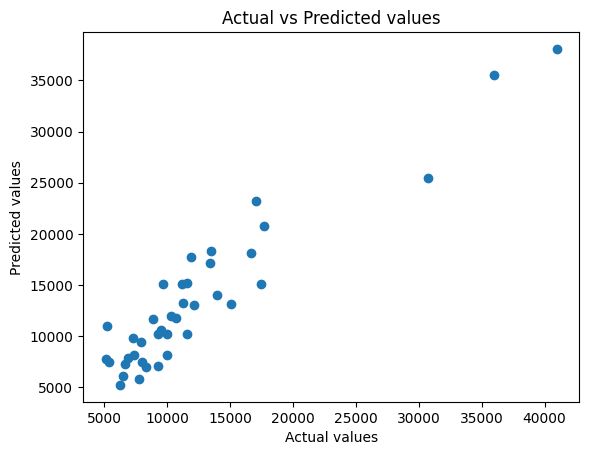

In [71]:
plt.scatter(ytest,ypred)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Step 6 : Evaluate Performance of Model

In [72]:
print('Training Accuracy : ',r2_score(lr.predict(xtrain),ytrain))
print('Testing Accuracy : ',r2_score(ytest,ypred))

Training Accuracy :  0.8371559008053132
Testing Accuracy :  0.8630985579034269


In [73]:
print("Accuracy = ",r2_score(ytest,ypred))
print('MAE = ',mean_absolute_error(ytest,ypred))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,ypred)))
print('MSE = ',mean_squared_error(ytest,ypred))
print('RMSLE = ',np.log(np.sqrt(mean_squared_error(ytest,ypred))))

Accuracy =  0.8630985579034269
MAE =  2284.6261555183496
RMSE =  2844.1250968713066
MSE =  8089047.566653218
RMSLE =  7.953010776197434


#### Ridge Regularization

In [74]:
l = Ridge(alpha = 1.0)
l.fit(xtrain,ytrain)
yp = l.predict(xtest)

In [75]:
print(r2_score(l.predict(xtrain),ytrain))
print(r2_score(ytest,yp))

0.8356298476189921
0.8674233120274071


##### Evaluate Performance of Model

In [76]:
print("Accuracy = ",r2_score(ytest,yp))
print('MAE = ',mean_absolute_error(ytest,yp))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,yp)))
print('MSE = ',mean_squared_error(ytest,yp))
print('RMSLE = ',np.log(np.sqrt(mean_squared_error(ytest,yp))))

Accuracy =  0.8674233120274071
MAE =  2253.189939218884
RMSE =  2798.841248489553
MSE =  7833512.334246561
RMSLE =  7.936960770682803


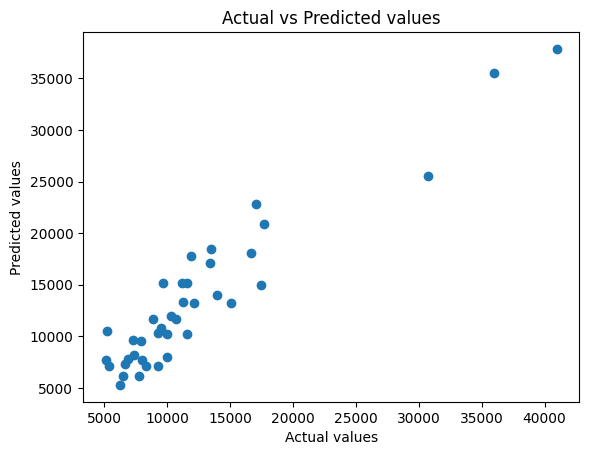

In [77]:
plt.scatter(ytest,yp)
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## Conclusion:
#### Main goal of project is to predict prices of cars based on various features.
#### Here are some steps which I covered :
### 1) Data Collection:
#####      Data collected from kaggle.com.
### 2) Data Understanding:
#####      Gets all detail information about dataset such as feature Name, data types, number of rows and columns,total size of dataset.
#####      i) Try to find null or missing values.
#####      ii) Checking outliers.
#####      iii) Finding Duplicate values.
### 3) Data Manipulation:
#####       i) Replaced missing values using dropping and imputation process.
#####       ii) Handled outliers.
### 4) Data Visualization:
#####       Here finding out some problem statements or insights in a datasets and visualize it.
### 5) Build Model:
#####       Linear Regression model and Ridge regularization technique.
### 6) Evaluation model:
#####       Calculated performance or accuarcy of a model.
#####       Try to compared accuracy of a model between Linear Regression and Ridge.
#####       Using Linear Regression accuracy of a model is 86.30%.
#####       Using Ridge technique accuracy of a model is 86.74%.